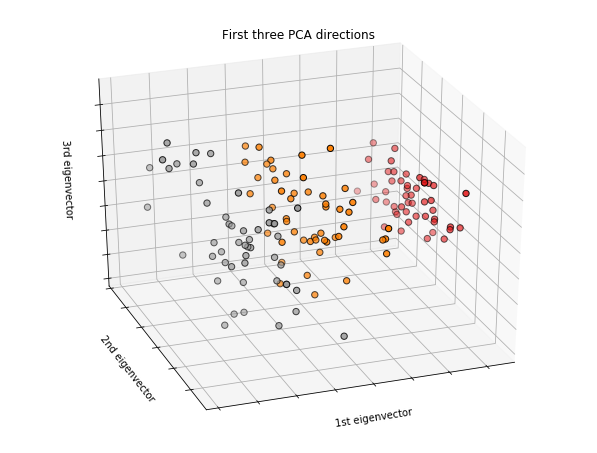

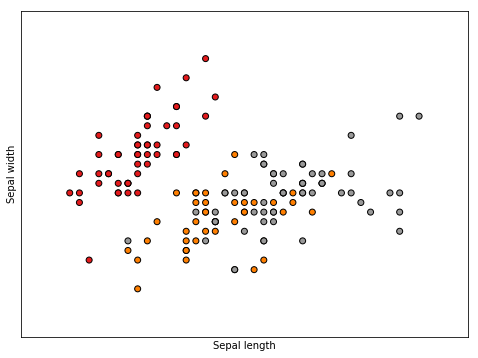

In [1]:
%matplotlib inline
import ipywidgets as widgets
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5 

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [6]:
#Respuestas D:

  #1. ¿Cuantas dimensiones tiene?
    # 3
  #2. ¿Cuantas clases?
    # 3
  #3. ¿Siguen una distribución normal?
    # Sí
  #4. ¿Cuantos parámetros debería tener el modelo?
    # 2((2)(3))

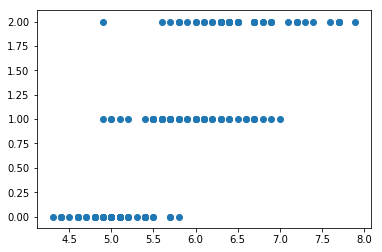

In [3]:
# Plot nth feature
@interact(n=(1,4))
def plot_nth(n=1):
    X = iris.data[:, n-1:n]
    Y = np.expand_dims(iris.target, axis=1)
    plt.scatter(X, Y)

In [4]:
# Gaussian classifier and training
classifier = GaussianNB()
classifier.fit(iris.data, iris.target)

classifier.predict(np.array([[1,9,0,1]]))

array([0])

In [7]:
# Transform training outputs
fun = lambda x: 1 if x == 1 else 0
Y = np.array(list(map(fun, iris.target)))
X = iris.data[:, :1]

In [8]:
# Logistic classifier and training
log_classifier = None
@interact(loss=['log', 'hinge', 'perceptron'], penalty=['none', 'l1', 'l2'])
def log_classify(loss='log', penalty=None):
    global log_classifier
    log_classifier = SGDClassifier(loss=loss, penalty=penalty, max_iter=1000)
    log_classifier.fit(X, Y)
    print(log_classifier.coef_)
    print(log_classifier.intercept_)

[[ 0.6347014]]
[-2.55654821]


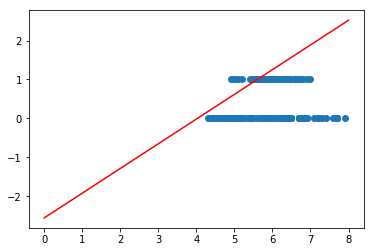

In [9]:
sample_x = np.expand_dims(np.linspace(0, 8), axis=1)
sample_y = log_classifier.intercept_ + (sample_x * log_classifier.coef_)
plt.scatter(X, Y)
plt.plot(sample_x, sample_y, color='r')

In [10]:
log_classifier.coef_[:,]


array([[ 0.6347014]])

In [20]:
log_classifier.penalty = 'l2'
log_classifier.loss = 'log'
log_classifier.coef_[:,]

array([[ 0.6347014]])